In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

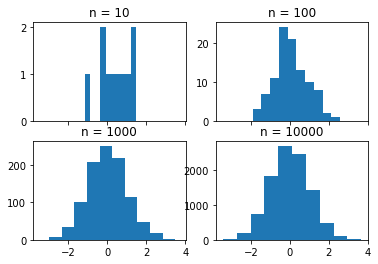

In [2]:
# Let's pull some samples from the normal distribution

# We won't lock the y-axis since we intend to use different
# sample sizes
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range (0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title(f'n = {sample_size}')

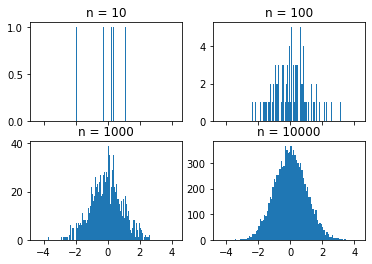

In [4]:
# Notice that the bins widen as the sample size grows, this
# is because 10 is the default number of bins

# Let's see what happens if we instead use 100 bins
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range (0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title(f'n = {sample_size}')

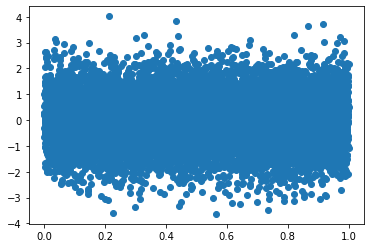

In [6]:
# For a better layout we can use GridSpec, which allows for mapping
# of axes over multiple cells in a grid

# If we just plot them like this, is not clear what the distribution
# of each axis is
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

plt.figure()

plt.scatter(X,Y)

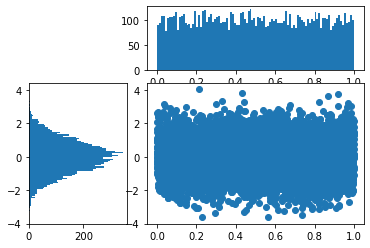

In [11]:
# So we can add tiny histograms on the sides
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:,1:])

lower_right.scatter(X,Y)
top_histogram.hist(X, bins = 100)
# Let's do a -90 degrees roration to line it to the axis
side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

plt.show()

In [12]:
# We dont't really care about the value of the y-axes for
# the top histogram or the value of the x-axes for the bottom
# histogram

# Since these are probability density histograms, we care only 
# about relative values

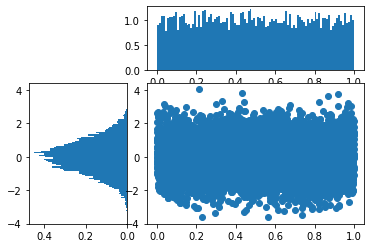

In [15]:
plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:,1:])

lower_right.scatter(X,Y)

# The normed = True argument tells matplotlib to scale the frequency
# data in the histogram between 0 and 1
top_histogram.hist(X, bins = 100, density = True)

side_histogram.hist(Y, bins = 100, orientation = 'horizontal', density = True)
# Invert the orientation 
side_histogram.invert_xaxis()

plt.show()

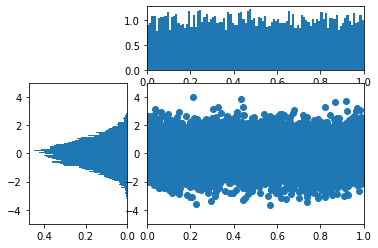

In [17]:
# Let's set the range of the axis to clear things a little bit more
plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:,1:])

lower_right.scatter(X,Y)

top_histogram.hist(X, bins = 100, density = True)

side_histogram.hist(Y, bins = 100, orientation = 'horizontal', density = True)

side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0,1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5,5)